# Install libraries

In [46]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import csv
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Test connection to website

In [8]:
# def scrape_links(driver, url, parent_country=None):
#     # Visit the URL
#     driver.get(url)
#     time.sleep(2)  # pause to mimic human behavior

#     # Parse the page with BeautifulSoup
#     soup = BeautifulSoup(driver.page_source, 'html.parser')

#     # Find all 'a' tags with class 'country-link'
#     links = soup.find_all('a', class_='country-link')

#     # Initialize an empty dictionary
#     country_links = {}

#     # For each link, add an entry to the dictionary with the country name as the key and the URL as the value
#     for link in links:
#         url = link['href']
#         country = link.text.strip()  # .strip() removes leading/trailing whitespace
#         country_links[country] = {'url': url, 'parent_country': parent_country}

#         # If the link contains 'maps', follow it and scrape links on the new page
#         if 'maps' in url:
#             country_links.update(scrape_links(driver, 'https://www.stampworld.com' + url, parent_country=country))

#     return country_links

In [22]:
def scrape_links(driver, url, continent, parent_countries=None):
    # If parent_countries is None, initialize it as an empty list
    if parent_countries is None:
        parent_countries = []

    # Visit the URL
    driver.get(url)
    time.sleep(2)  # pause to mimic human behavior

    # Parse the page with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Find all 'a' tags with class 'country-link'
    links = soup.find_all('a', class_='country-link')

    # Initialize an empty dictionary
    country_links = {}

    # For each link, add an entry to the dictionary with the country name as the key and the URL as the value
    for link in links:
        url = link['href']
        country = link.text.strip()  # .strip() removes leading/trailing whitespace
        country_links[country] = {'url': url, 'parent_countries': list(parent_countries), 'continent': continent}  # make a copy of the list

        # If the link contains 'maps', follow it and scrape links on the new page
        if 'maps' in url:
            # Add the current country to the list of parent countries
            new_parent_countries = parent_countries + [country]
            country_links.update(scrape_links(driver, 'https://www.stampworld.com' + url, continent, parent_countries=new_parent_countries))

    return country_links

In [23]:
driver = webdriver.Firefox()  # or webdriver.Chrome()

# Scrape links starting from the main page
country_links = {}
continents = ['Europe', 'North-America', 'South-America', 'Africa', 'Asia', 'Oceania']
for continent in continents:
    country_links.update(scrape_links(driver, f'https://www.stampworld.com/en/maps/{continent}/', continent))
    # country_links = scrape_links(driver, f'https://www.stampworld.com/en/maps/{continent}/', continent)
# country_links = scrape_links(driver, 'https://www.stampworld.com/en/maps/Europe/')

# Close the driver when you're done
driver.quit()

In [24]:
print(len(country_links))

1183


In [19]:
# Print the dictionary
for country, info in country_links.items():
    print(f'Country: {country}, URL: {info["url"]}, Parent Countries: {info["parent_countries"]}, Continent: {info["continent"]}')

Country: Aaland, URL: /en/stamps/Aaland/, Parent Countries: ['Finland'], Continent: Europe
Country: Aegean Islands, URL: /en/stamps/Aegean-Islands/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Continent: Europe
Country: Calimno, URL: /en/stamps/Calimno/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Continent: Europe
Country: Caso, URL: /en/stamps/Caso/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Continent: Europe
Country: Castelrosso, URL: /en/stamps/Castelrosso/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Continent: Europe
Country: Cos, URL: /en/stamps/Cos/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Continent: Europe
Country: Karki, URL: /en/stamps/Karki/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Continent: Europe
Country: Leros, URL: /en/stamps/Leros/, Parent Countries: ['Italy', 'Italian Occupations', 'Aegean Islands'], Con

In [ ]:
# driver = webdriver.Firefox()

# driver.get('https://www.stampworld.com/en/maps/Europe/')

# html = driver.page_source
# soup = BeautifulSoup(html, 'html.parser')

# links = soup.find_all('a', class_='country-link')

# country_links_europe = {}

# for link in links:
#     url = link['href']
#     country = link.text.strip()
#     country_links_europe[country] = url

# for country, url in country_links_europe.items():
#     print(f'Country: {country}, URL: {url}')

# driver.quit()

## plot amount of countries for each continent

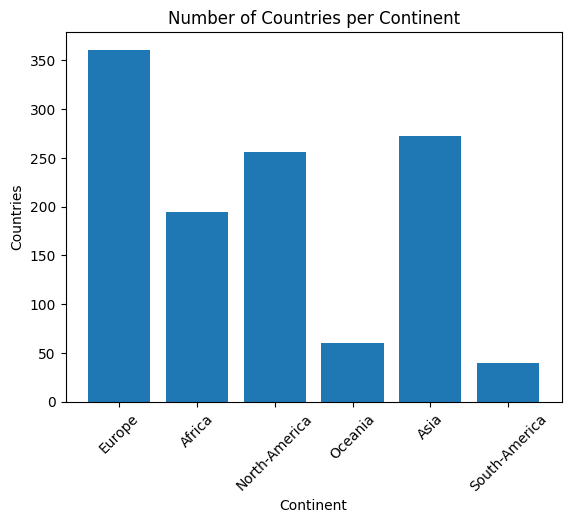

In [28]:
continent_counts = {}
for country, info in country_links.items():
    continent = info['continent']
    if continent not in continent_counts:
        continent_counts[continent] = 0
    continent_counts[continent] += 1

# Create a bar plot
plt.bar(continent_counts.keys(), continent_counts.values())
plt.xlabel('Continent')
plt.ylabel('Countries')
plt.title('Number of Countries per Continent')
plt.xticks(rotation=45)
plt.show()

## save links for all countries

In [42]:
df = pd.DataFrame(country_links).T
# drop all rows where the url is not a stamps link
df = df[df['url'].str.contains('stamps')]
df.to_csv('country_links.csv')

# test getting stamp info from url

In [45]:
import requests

# Define the URL and parameters
url = 'https://www.stampworld.com/stamps/stamp_info_popup2/'  # Replace with the correct base URL
params = {
    'mode': 'view',
    'id': 186634
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse and print the response content
    # print(response)
    content = response.text  # or response.text if the response is not JSON
    print('Data received:', content)
    # Here you can call the update_pane method with the content if needed
    # self.update_pane(content)  # Uncomment and modify if needed
else:
    print(f"Failed to retrieve data: {response.status_code}")
    print(response.text)

Data received: 


<div class="jqmWindow-responsive" id="infoUploadDiv">
  <p style='text-align: right; margin: 10px;'>
    <a class="uploadCloseButton"><img src="/static/layout/close-btn.gif" alt="Close" title="Close"/></a>
  </p>

  <iframe id="uploadIframe">
  </iframe>
</div>

<div class="card info-card info-main-view-card">
  <div class="card-header">
      <span>
	Bosnia-Herzegovina
	- Eagle - Lithographed. All 3 Eaglets on R...
      </span>
      <img src="/static/layout/close-btn.gif" alt="Close" class="closeButton uploadCloseButton"/>
  </div>

  <div class="card-body">

    
    
    <ul class="nav nav-tabs">
      <li>
	<a href="#" data-url="/stamps/stamp_info_popup2/" class="nav-link active">
	  Stamp info
	</a>
      </li>
      <li>
	<a href="#" data-url="/stamps/stamp_info_variants/" class="nav-link">
	   Variants
	</a>
      </li>
      <li>
	<a href="#" data-url="/stamps/stamp_info_article_list/" class="nav-link">
	  Articles
	</a>
      </li>
      <li>
	<a href="#" d

### show example picture

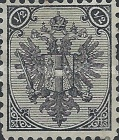

In [47]:
image_url = "https://www.stampworld.com/media/catalogue/Bosnia-Herzegovina/Postage-stamps/AAA-i.jpg"

# Fetch the image
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image
    image = Image.open(BytesIO(response.content))
    # Display the image
    display(image)
else:
    print(f"Failed to retrieve image. Status code: {response.status_code}")